In [1]:
import networkx as nx
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import kdegree as kd

Stats before anonymisation:
Num edges = 488
k = 1
Full degree sequence = [18, 17, 17, 17, 17, 17, 16, 14, 14, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 3]

Original graph =


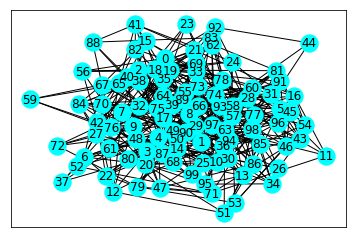

Anonymisation...


Stats before swapping edges to maximise overlap:
Edge overlap = 10.612244897959183%
Num edges = 491
k = 2
Full degree sequence = [18, 18, 17, 17, 17, 17, 17, 14, 14, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4]

Stats after swapping edges to maximise overlap:
Edge overlap = 12.857142857142858%
Num edges = 491
k = 2
Full degree sequence = [18, 18, 17, 17, 17, 17, 17, 14, 14, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4]

Anonymised g

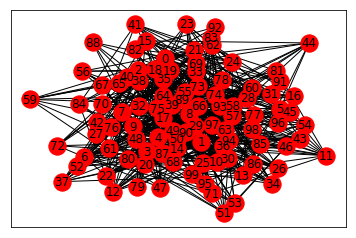

Stats when anonymised with PRIORITY:
Edge overlap = 76.73469387755102%
Num edges = 491
k = 2
Full degree sequence = [18, 18, 17, 17, 17, 17, 17, 14, 14, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4]

Anonymised graph with PRIORITY =


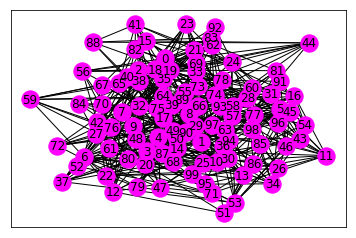

In [2]:
G = nx.erdos_renyi_graph(100,0.1)
#nx.write_gpickle(G,'test graphs/er_test_0.gpkl')
#G = nx.read_gpickle('test graphs/er_test_2.gpkl')

print("Stats before anonymisation:")
print("Num edges = " + str(nx.number_of_edges(G)))
degree_sequence = kd.get_degree_sequence(G)
degree_sequence.sort(reverse=True)
min_k = 1e8
for d in degree_sequence:
    d_k = degree_sequence.count(d)
    min_k = d_k if d_k < min_k else min_k
print("k = " + str(min_k))
print("Full degree sequence =",degree_sequence)

print("\nOriginal graph =")

pos = nx.spring_layout(G)
nx.draw_networkx(G,pos=pos,with_labels=True,node_color='cyan')
plt.show()

print("Anonymisation...\n\n")
k=2

Ga = kd.graph_anonymiser(G,k,with_priority=False)

print("Stats before swapping edges to maximise overlap:")
H = nx.intersection(Ga,G)
print("Edge overlap = " + str(100*nx.number_of_edges(H)/nx.number_of_edges(G))+"%")
print("Num edges = " + str(nx.number_of_edges(Ga)))
degree_sequence = kd.get_degree_sequence(Ga)
min_k = 1e8
for d in degree_sequence:
    d_k = degree_sequence.count(d)
    min_k = d_k if d_k < min_k else min_k
print("k = " + str(min_k))
print("Full degree sequence =",degree_sequence)

Gaa = kd.greedy_swap(Ga,G.edges())

print("\nStats after swapping edges to maximise overlap:")
H = nx.intersection(Gaa,G)
print("Edge overlap = " + str(100*nx.number_of_edges(H)/nx.number_of_edges(G))+"%")
print("Num edges = " + str(nx.number_of_edges(Gaa)))

degree_sequence = kd.get_degree_sequence(Gaa)
min_k = 1e8
for d in degree_sequence:
    d_k = degree_sequence.count(d)
    min_k = d_k if d_k < min_k else min_k
print("k = " + str(min_k))
print("Full degree sequence =",degree_sequence)

print("\nAnonymised graph with GREEDY SWAP =")
nx.draw_networkx(Gaa,pos=pos,with_labels=True,node_color='red')
plt.show()

#G = nx.read_gpickle('test graphs/er_test_1.gpkl')
Gap = kd.graph_anonymiser(G,k,with_priority=True)

print("Stats when anonymised with PRIORITY:")
H = nx.intersection(Gap,G)
print("Edge overlap = " + str(100*nx.number_of_edges(H)/nx.number_of_edges(G))+"%")
print("Num edges = " + str(nx.number_of_edges(Gap)))

degree_sequence = kd.get_degree_sequence(Gap)
min_k = 1e8
for d in degree_sequence:
    d_k = degree_sequence.count(d)
    min_k = d_k if d_k < min_k else min_k
print("k = " + str(min_k))
print("Full degree sequence =",degree_sequence)

print("\nAnonymised graph with PRIORITY =")
nx.draw_networkx(Gap,pos=pos,with_labels=True,node_color='magenta')
plt.show()

In [ ]:
k = 3
G = nx.read_gpickle('test graphs/er_test_0.gpkl')
min_k = k

while min_k >= k:
    G = nx.read_gpickle('test graphs/er_test_0.gpkl')
    Gap = kd.graph_anonymiser(G,k,with_priority=True)

    degree_sequence = kd.get_degree_sequence(Gap)
    min_k = 1e8
    for d in degree_sequence:
        d_k = degree_sequence.count(d)
        min_k = d_k if d_k < min_k else min_k
    if min_k < k:
        print("oops",min_k,degree_sequence)
        break

In [3]:
k=5
d = rn.choices(range(20),k=100)
ad = kd.greedy_degree_anonymiser(d,k)
min_k = 1e8
for d in ad:
    d_k = ad.count(d)
    min_k = d_k if d_k < min_k else min_k
max_iter = 1000
n_iter = 1
while min_k >= k and n_iter < max_iter:
    degree_sequence = rn.choices(range(20),k=20)
    degree_sequence.sort(reverse=True)
    ad = kd.greedy_degree_anonymiser(degree_sequence,k)
    min_k = 1e8
    for d in ad:
        d_k = ad.count(d)
        min_k = d_k if d_k < min_k else min_k
    n_iter += 1
if n_iter < max_iter:
    print(n_iter)
    print(degree_sequence,ad)